In [31]:
import numpy as np
import pandas
import glob
from copy import deepcopy
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm

from scipy.stats import *
from sklearn import linear_model
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

from get_LWPCMIP5data import *
from get_LWPCMIP6data import *
from get_OBSLRMdata import *
from useful_func_cy import *
from fitLRM_cy1 import *
from fitLRM_cy2 import *

from fitLRMobs import *
from useful_func_cy import *
from calc_Radiation_LRM_1 import *
from calc_Radiation_LRM_2 import *

from area_mean import *
from binned_cyFunctions5 import *
from useful_func_cy import *

import cartopy.crs as ccrs   #..projection method
import cartopy.feature as cfeat
import matplotlib.ticker as mticker
from matplotlib import cm
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# OBServational constraint on the radiation and LWP:
from calc_LRMobs_metric import *
from calc_Radiation_OBS_2 import *
from Aploting_Sep11 import *


In [32]:
# Calculate 5*5 bin array for variables (LWP, CCFs) in Sounthern Ocean Region:
#..set are-mean range and define function
s_range = arange(-90., 90., 5.) + 2.5  #..global-region latitude edge: (36)
x_range = arange(-180., 180., 5.)  #..logitude sequences edge: number: 72
y_range = arange(-85, -40., 5.) + 2.5  #..southern-ocaen latitude edge: 9

# path6 = '/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/plot_file/plots_Oct24_revise_add_YSSAR/'
path_data = '/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/'
path_plot = '/glade/work/chuyan/Research/Cloud_CCFs_RMs/Tan_et_al_2023_JGR-A__/plot_file/'

valid_range1=[1992, 1, 15]
valid_range2=[2016, 12, 31]

In [33]:
# model list

exp = 'piControl'
    
# CMIP6: 31 (30: BCCCSMCM2MR)
AWICM11MR = {'modn': 'AWI-CM-1-1-MR', 'consort': 'AWI', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
BCCESM1 = {'modn': 'BCC-ESM1', 'consort': 'BCC', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CAMSCSM1 = {'modn': 'CAMS-CSM1-0', 'consort': 'CAMS', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CMCCCM2SR5 = {'modn': 'CMCC-CM2-SR5', 'consort': 'CMCC', 'cmip': 'cmip6', 
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2 = {'modn': 'CESM2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2FV2 = {'modn': 'CESM2-FV2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2WACCM = {'modn': 'CESM2-WACCM', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2WACCMFV2 = {'modn': 'CESM2-WACCM-FV2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CNRMCM61 = {'modn': 'CNRM-CM6-1', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6', 
               'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CNRMCM61HR = {'modn': 'CNRM-CM6-1-HR', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CNRMESM21 = {'modn': 'CNRM-ESM2-1', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CanESM5 = {'modn': 'CanESM5', 'consort': 'CCCma', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
E3SM10 = {'modn': 'E3SM-1-0', 'consort': 'E3SM-Project', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}
ECEarth3 = {'modn': 'EC-Earth3', 'consort': 'EC-Earth-Consortium', 'cmip': 'cmip6',
       'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}
ECEarth3Veg = {'modn': 'EC-Earth3-Veg', 'consort': 'EC-Earth-Consortium', 'cmip': 'cmip6',
       'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}
FGOALSg3 = {'modn': 'FGOALS-g3', 'consort': 'CAS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE21G = {'modn': 'GISS-E2-1-G', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE21H = {'modn': 'GISS-E2-1-H', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE22G = {'modn': 'GISS-E2-2-G', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GFDLCM4 = {'modn': 'GFDL-CM4', 'consort': 'NOAA-GFDL', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}
INM_CM48 = {'modn': 'INM-CM4-8', 'consort': 'INM', 'cmip': 'cmip6', 
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}
IPSLCM6ALR = {'modn': 'IPSL-CM6A-LR', 'consort': 'IPSL', 'cmip': 'cmip6',
                  'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}
MIROCES2L = {'modn': 'MIROC-ES2L', 'consort': 'MIROC', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gn', "typevar": 'Amon'}
MIROC6 = {'modn': 'MIROC6', 'consort': 'MIROC', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
MPIESM12LR = {'modn': 'MPI-ESM1-2-LR', 'consort': 'MPI-M', 'cmip': 'cmip6',
                  'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
MRIESM20 = {'modn': 'MRI-ESM2-0', 'consort': 'MRI', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
NESM3 = {'modn': 'NESM3', 'consort': 'NUIST', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
NorESM2MM = {'modn': 'NorESM2-MM', 'consort': 'NCC', 'cmip': 'cmip6',
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
SAM0 = {'modn': 'SAM0-UNICON', 'consort': 'SNU', 'cmip': 'cmip6', 
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
TaiESM1 = {'modn': 'TaiESM1', 'consort': 'AS-RCEC', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

# CMIP5: 20 (18, ACCESS10, ACCESS13)
ACCESS10 = {'modn': 'ACCESS1-0', 'consort': 'CSIRO-BOM', 'cmip': 'cmip5',   # 2-d (145) and 3-d (146) variables have different lat shape
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
ACCESS13 = {'modn': 'ACCESS1-3', 'consort': 'CSIRO-BOM', 'cmip': 'cmip5',   # 2-d (145) and 3-d (146) variables have different lat shape
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
BNUESM = {'modn': 'BNU-ESM', 'consort': 'BNU', 'cmip': 'cmip5',
          'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
CCSM4 = {'modn': 'CCSM4', 'consort': 'NCAR', 'cmip': 'cmip5',
             'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
CNRMCM5 = {'modn': 'CNRM-CM5', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
CSIRO_Mk360 = {'modn': 'CSIRO-Mk3-6-0', 'consort': 'CSIRO-QCCCE', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
CanESM2 = {'modn': 'CanESM2', 'consort': 'CCCma', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
FGOALSg2 = {'modn': 'FGOALS-g2', 'consort': 'LASG-CESS', 'cmip': 'cmip5',   # missing 'prw' in piControl
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
FGOALSs2 = {'modn': 'FGOALS-s2', 'consort': 'LASG-IAP', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GFDLCM3 = {'modn': 'GFDL-CM3', 'consort': 'NOAA-GFDL', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GISSE2H = {'modn': 'GISS-E2-H', 'consort': 'NASA-GISS', 'cmip': 'cmip5',
           'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GISSE2R = {'modn': 'GISS-E2-R', 'consort': 'NASA-GISS', 'cmip': 'cmip5',
           'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
IPSLCM5ALR = {'modn': 'IPSL-CM5A-LR', 'consort': 'IPSL', 'cmip': 'cmip5',
               'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MIROC5 = {'modn': 'MIROC5', 'consort': 'MIROC', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MPIESMMR = {'modn': 'MPI-ESM-MR', 'consort': 'MPI-M', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
NorESM1M = {'modn': 'NorESM1-M', 'consort': 'NCC', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MIROCESM = {'modn': 'MIROC-ESM', 'consort': 'MIROC', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MRICGCM3 = {'modn': 'MRI-CGCM3', 'consort': 'MRI', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MPIESMLR = {'modn': 'MPI-ESM-LR', 'consort': 'MPI-M', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
bcccsm11 = {'modn': 'bcc-csm1-1', 'consort': 'BCC', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GFDLESM2G = {'modn': 'GFDL-ESM2G', 'consort': 'NOAA-GFDL', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GFDLESM2M = {'modn': 'GFDL-ESM2M', 'consort': 'NOAA-GFDL', 'cmip': 'cmip5', 
           'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}

# cmip5 + cmip6 (50):

deck3 = [CESM2WACCMFV2, CESM2FV2, TaiESM1, CESM2WACCM, CESM2, SAM0, E3SM10, CMCCCM2SR5, NorESM1M, GFDLCM3, CCSM4, GISSE2H, ECEarth3, GISSE21H, BNUESM, GFDLCM4, CNRMESM21, ECEarth3Veg, IPSLCM5ALR, BCCESM1, CNRMCM61, CNRMCM61HR, MRICGCM3, FGOALSg2, GISSE22G, IPSLCM6ALR, GISSE2R, GISSE21G, bcccsm11, NESM3, NorESM2MM, MRIESM20, CanESM5, FGOALSg3, MIROCES2L, MIROC5, CanESM2, AWICM11MR, MIROC6, FGOALSs2, CSIRO_Mk360, INM_CM48, CNRMCM5, CAMSCSM1, MIROCESM, GFDLESM2G, MPIESM12LR, MPIESMLR, GFDLESM2M, MPIESMMR]
deck3_nas = ['CESM2WACCMFV2', 'CESM2FV2', 'TaiESM1', 'CESM2WACCM', 'CESM2', 'SAM0', 'E3SM10', 'CMCCCM2SR5', 'NorESM1M', 'GFDLCM3', 'CCSM4', 'GISSE2H', 'ECEarth3', 'GISSE21H', 'BNUESM', 'GFDLCM4', 'CNRMESM21', 'ECEarth3Veg', 'IPSLCM5ALR', 'BCCESM1', 'CNRMCM61', 'CNRMCM61HR', 'MRICGCM3', 'FGOALSg2', 'GISSE22G', 'IPSLCM6ALR', 'GISSE2R', 'GISSE21G', 'bcccsm11', 'NESM3', 'NorESM2MM', 'MRIESM20', 'CanESM5', 'FGOALSg3', 'MIROCES2L', 'MIROC5', 'CanESM2', 'AWICM11MR', 'MIROC6', 'FGOALSs2', 'CSIRO_Mk360', 'INM_CM48', 'CNRMCM5', 'CAMSCSM1', 'MIROCESM', 'GFDLESM2G', 'MPIESM12LR', 'MPIESMLR', 'GFDLESM2M', 'MPIESMMR']

### Fig 4:
R^{2} between the predicted LWP and GCM-output LWP in piControl (and abrupt4xCO_{2}) simulations VS. the partition surface Temperature for 50 GCM:

In [34]:
# variables:
R2_pi = {}   # R^2 for piControl along the best_Partition_Subsidence_AT500
R2_abr4X = {}   # R^2 for abr4X along the best_Partition_Subsidence_AT500
Ts_gcm = {}   # Partition Temperature along the best_Partition_Subsidence_AT500

TR_Ts_gcm_pi = {}   # best_Partition_Temperature at piControl
TR_SUB500_gcm_pi = {}   # best_Partition_Subsidence_AT500 at piControl
TR_Ts_gcm_abr4X = {}   # best_Partition_Temperature at abrupt4xCO_2
TR_SUB500_gcm_abr4X = {}   # best_Partition_Subsidence_AT500 at abrupt4xCO_2


for N_of_model in range(len(deck3)):

    # WD = '/glade/scratch/chuyan/CMIP_output/'
    # folder = glob.glob(WD+ deck3_nas[N_of_model]+'__'+ 'STAT_pi+abr_'+'22x_31y_Sep9th_anomalies'+ '.npz')
    
    WD = '/glade/scratch/chuyan/CMIP_output/CMIP_partition_RESULT/'
    folder = glob.glob(WD+ deck3_nas[N_of_model]+'__'+ 'STAT_pi+abr_'+'22x_31y_June7_23_anomalies'+ '.npz')
    # print(folder)
    
    output_ARRAY = np.load(folder[0], allow_pickle=True)  # str(TR_sst)
    TR_sst1 = output_ARRAY['TR_minabias_SST']
    TR_sub1 = output_ARRAY['TR_minabias_SUB']
    TR_sst2 = output_ARRAY['TR_maxR2_SST']
    TR_sub2 = output_ARRAY['TR_maxR2_SUB']
    
    TR_Ts_gcm_pi[deck3_nas[N_of_model]] = TR_sst2
    TR_SUB500_gcm_pi[deck3_nas[N_of_model]] = TR_sub2
    TR_Ts_gcm_abr4X[deck3_nas[N_of_model]] = TR_sst1
    TR_SUB500_gcm_abr4X[deck3_nas[N_of_model]] = TR_sub1
    print("GCM: No.", str(N_of_model+1), " :", deck3[N_of_model]['modn'])
    print("TR_min_abs(bias): " , TR_sst1, ' K ', TR_sub1 , ' Pa/s ')
    print("TR_large_pi_R_2: ", TR_sst2, ' K ', TR_sub2 , ' Pa/s ')

    x_gcm = np.asarray(output_ARRAY['bound_x'])  # Partition_Subsidence_AT500 metric
    y_gcm = np.asarray(output_ARRAY['bound_y'])  # Partition_Temperature metric
    
    stats_5 = output_ARRAY['stats_5']   # R^2 for piControl prediction of Equation_3 and GCM_output
    stats_3 = output_ARRAY['stats_3']   # R^2 for abrupt4xCO_2 prediction of Equation_3 and GCM_output
    # print(stats_5.shape)
    

    # Retrieve the R2 along the best_Partition_Subsidence_AT500 vs. Partition Surface Temperature:
    R2_pi_gcm_Ts = []
    R2_abr4x_gcm_Ts = []
    
    for j in range(len(x_gcm)):
        if TR_sub2 == x_gcm[j]:
            # print("the "+str(j)+"th column for maximum piControl R^2 is the best_Partition_Subsidence_AT500.")
            R2_pi_gcm_Ts = stats_5[:, j]
        if TR_sub1 == x_gcm[j]:
            # print("the "+str(j)+"th column for minimum abrupt4xCO_2 absolute bias the best_Partition_Subsidence_AT500.")
            R2_abr4x_gcm_Ts = stats_3[:, j]
            
    # wanted variables:
    
    Ts_gcm[deck3_nas[N_of_model]] = y_gcm[:-1]
    
    R2_pi[deck3_nas[N_of_model]] = R2_pi_gcm_Ts
    
    R2_abr4X[deck3_nas[N_of_model]] = R2_abr4x_gcm_Ts

GCM: No. 1  : CESM2-WACCM-FV2
TR_min_abs(bias):  -0.4543939563130124  K  0.018926970115519692  Pa/s 
TR_large_pi_R_2:  -0.4543939563130124  K  0.022440653727358602  Pa/s 
GCM: No. 2  : CESM2-FV2
TR_min_abs(bias):  -0.4166473052605397  K  0.015499345528856227  Pa/s 
TR_large_pi_R_2:  -0.4166473052605397  K  0.01903411147435241  Pa/s 
GCM: No. 3  : TaiESM1
TR_min_abs(bias):  0.473175295484765  K  0.005732155617473866  Pa/s 
TR_large_pi_R_2:  -2.177340042480459  K  0.00196181655475558  Pa/s 
GCM: No. 4  : CESM2-WACCM
TR_min_abs(bias):  0.34946251864153766  K  0.017033585286237378  Pa/s 
TR_large_pi_R_2:  0.34946251864153766  K  0.017033585286237378  Pa/s 
GCM: No. 5  : CESM2
TR_min_abs(bias):  0.2841552826285252  K  0.01707090606822593  Pa/s 
TR_large_pi_R_2:  0.2841552826285252  K  0.01707090606822593  Pa/s 
GCM: No. 6  : SAM0-UNICON
TR_min_abs(bias):  1.2375991279058098  K  0.012564953659786424  Pa/s 
TR_large_pi_R_2:  1.2375991279058098  K  0.008905443917087391  Pa/s 
GCM: No. 7  : E3S

plotting R^{2} versus the partition temperature as the relative value to GCMs' mean-state averaged surface temperature:

Text(0.5, 1.0, '$R^{2}\\ versus\\ Partition\\ Temperature\\ for\\ 50\\ GCMs$')

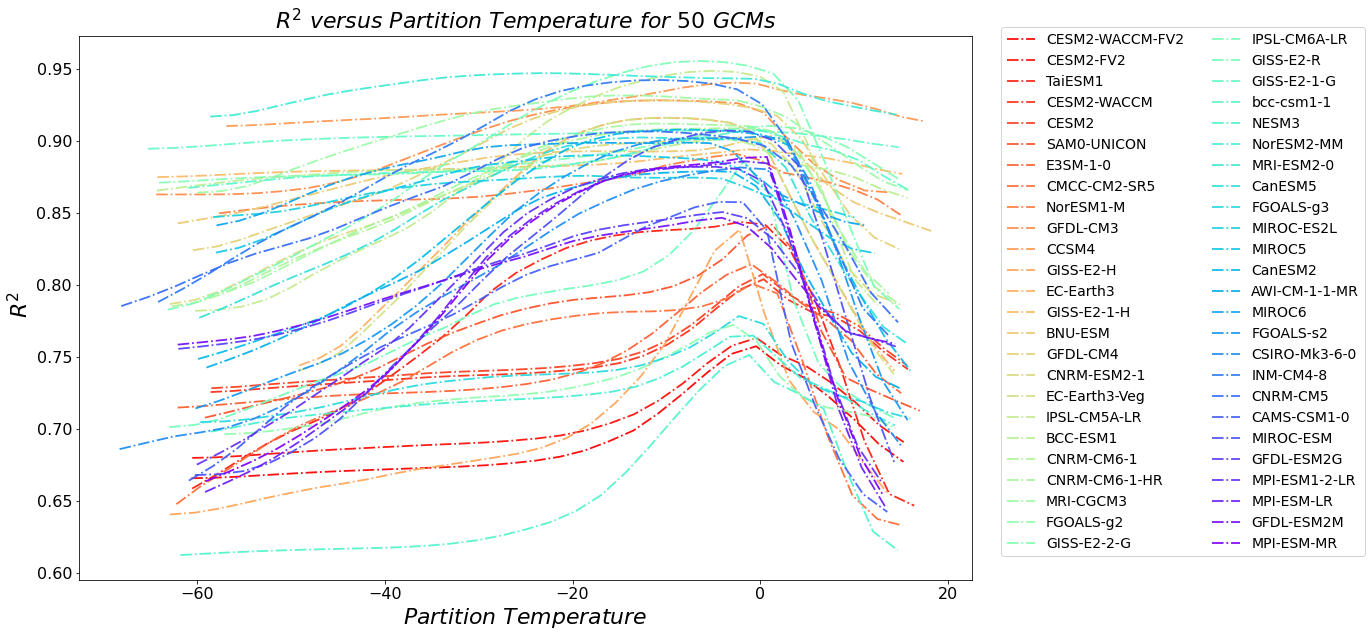

In [35]:
from matplotlib import colors as mcolor
import matplotlib.pylab as plab


# plot settings:
parameters = {'axes.labelsize': 22, 'legend.fontsize': 14,
         'axes.titlesize': 22,  'xtick.labelsize': 16,  'ytick.labelsize': 16}
plt.rcParams.update(parameters)

N = 50
colors = plab.cm.rainbow_r(np.linspace(0., 1., N))
# print(colors)


fig1 = plt.figure(figsize = (16, 10))
ax1 = fig1.add_subplot(111)

x = np.linspace(-70., 18., 120)
y = np.linspace(0.0, 1.0, 400)
ki = 0
kj = 0
    
for j in range(len(deck3_nas)):
    # separate cmip5 /cmip6:
    # if deck3[j]['cmip'] == 'cmip5':
    #     Line_cmip6 = ax1.plot(Ts_gcm[deck3_nas[j]], R2_pi[deck3_nas[j]], '-.', linewidth = 1.6, c = colors[ki], alpha = 0.945, markersize = 8, label = deck3[j]['modn'], zorder = 11)
    #     ki += 1
    # if deck3[j]['cmip'] == 'cmip6':
    #     Line_cmip5 = ax1.plot(Ts_gcm[deck3_nas[j]], R2_pi[deck3_nas[j]], '--', linewidth = 1.6, c = colors[kj], alpha = 0.945, markersize =10, label = deck3[j]['modn'], zorder = 10)
    #     kj += 1
        
    # do not separate cmip:
    Line_gcm = ax1.plot(Ts_gcm[deck3_nas[j]], R2_pi[deck3_nas[j]], '-.', linewidth = 1.8, c = colors[j], alpha = 0.945, markersize = 8, label = deck3[j]['modn'], zorder = 10)
    
# plt.legend([Line_cmip6, Line_cmip5], ['cmip6', 'cmip5'])

plt.legend(bbox_to_anchor = (1.025, 0.23, 0.2, 0.8), ncol = 2)
ax1.set_xlabel(r"$Partition\ Temperature\ $") #  + " Anomalies to the mean state "+ r"$T_{s}$")
ax1.set_ylabel(r"$\ R^{2}$")
ax1.set_title(r"$R^{2}\ versus\ Partition\ Temperature\ for\ 50\ GCMs$")

plotting R^{2} versus the the partition temperature as Kelvin unit:

In [36]:
## Read two Regimes (Warm, Cold) data

output_ARRAY = {}   # storage output file
output_intermedia = {}   # storage the 'rawdata_dict'

output_dict0_PI = {}
output_dict0_abr = {}

output_GMT = {}
output_2lrm_predict = {}  # dict, store annualy, area_meaned prediction of LWP
output_2lrm_report = {}  # dict, store annually, area_meaned actual values of GCMs LWP
output_2lrm_coef_LWP = {}
output_2lrm_dict_Albedo = {}  # Coefficients of 2 regimes's albedo trained by report 'LWP' data
# output_2lrm_dict_albedo_lL = {}

# Raw data
output_2lrm_yr_bin_abr = {}
output_2lrm_yr_bin_PI = {}
output_2lrm_mon_bin_abr = {}
output_2lrm_mon_bin_PI = {}

# Metric raw data in specific units:
shape_mon_pi = {}
shape_mon_abr = {}
output_2lrm_metric_actual_PI = {}
output_2lrm_metric_actual_abr = {}

# Statistic metrics of PI:
output_Mean_training = {}
output_Stdev_training = {}

# Predict metric data in specific units:
output_2lrm_mon_bin_LWPpredi_PI = {}
output_2lrm_mon_bin_LWPpredi_abr = {}
output_2lrm_DxDtG = {}

# Index for regime(s): Only for 2lrm
output_ind_Cold_PI = {}
output_ind_Hot_PI = {}
output_ind_Cold_abr = {}
output_ind_Hot_abr = {}

Tr_sst =  0.0

for i in range(len(deck3)):
    # print("i", i)
    # folder_2lrm = glob.glob(path_data+deck3[i]['modn'] + '_r2r1_hotcold(Jan)_(largestpiR2)_Sep9th_Anomalies' + '*' + '_dats.npz')
    
    # folder_2lrm = glob.glob(path_data+deck3[i]['modn'] + '_r2r1_hotcold(Jan)_(largestpiR2)_Sep9th_Anomalies_Rtest' + '*' + '_dats.npz')
    
    folder_2lrm = glob.glob(path_data+deck3[i]['modn'] + '__r2r1_warmcold(Jan)_(largestpiR2)_June7th_23_Anomalies_Rtest'+ '*' + '_dats.npz')
    print(len(folder_2lrm))
    
    if len(folder_2lrm) >3:
        
        if (len(folder_2lrm[0]) <  len(folder_2lrm[1])) & (len(folder_2lrm[0]) <  len(folder_2lrm[2])) & (len(folder_2lrm[0]) <  len(folder_2lrm[3])):
            folder_best2lrm = folder_2lrm[0]
        elif (len(folder_2lrm[1]) <  len(folder_2lrm[0])) & (len(folder_2lrm[1]) <  len(folder_2lrm[2])) & (len(folder_2lrm[1]) <  len(folder_2lrm[3])):
            folder_best2lrm = folder_2lrm[1]
        elif (len(folder_2lrm[2]) < len(folder_2lrm[0])) & (len(folder_2lrm[2]) < len(folder_2lrm[1])) & (len(folder_2lrm[2]) < len(folder_2lrm[3])):
            folder_best2lrm = folder_2lrm[2]
        else:
            folder_best2lrm = folder_2lrm[3]
        print(folder_best2lrm)
    
    elif len(folder_2lrm) == 3:
        
        if (len(folder_2lrm[1]) <  len(folder_2lrm[0])) & (len(folder_2lrm[1]) <  len(folder_2lrm[2])):
            folder_best2lrm = folder_2lrm[1]
        elif (len(folder_2lrm[0]) <  len(folder_2lrm[1])) & (len(folder_2lrm[0]) <  len(folder_2lrm[2])):
            folder_best2lrm = folder_2lrm[0]
        else:
            folder_best2lrm = folder_2lrm[2]
        print(folder_best2lrm)
    
    elif len(folder_2lrm) == 2:
        
        if len(folder_2lrm[1]) <  len(folder_2lrm[0]):
            folder_best2lrm = folder_2lrm[1]
        else:
            folder_best2lrm = folder_2lrm[0]
        print(folder_best2lrm)
        
    else:
        
        folder_best2lrm = folder_2lrm[0]
        print(folder_best2lrm)
    
    output_ARRAY[deck3_nas[i]] = load(folder_best2lrm, allow_pickle=True)  #+'_'+str(Tr_sst)
    
    output_intermedia[deck3_nas[i]] = output_ARRAY[deck3_nas[i]]['rawdata_dict']
    
    output_GMT[deck3_nas[i]] = output_intermedia[deck3_nas[i]][()]['GMT']
    output_2lrm_predict[deck3_nas[i]] = output_intermedia[deck3_nas[i]][()]['predicted_metrics']
    output_2lrm_report[deck3_nas[i]] = output_intermedia[deck3_nas[i]][()]['report_metrics']

    output_dict0_PI[deck3_nas[i]] = output_intermedia[deck3_nas[i]][()]['dict1_PI_var']
    output_dict0_abr[deck3_nas[i]] = output_intermedia[deck3_nas[i]][()]['dict1_abr_var']
    
    output_2lrm_coef_LWP[deck3_nas[i]] = output_intermedia[deck3_nas[i]][()]['Coef_dict']
    output_2lrm_dict_Albedo[deck3_nas[i]] = output_intermedia[deck3_nas[i]][()]['coef_dict_Albedo_pi']
    
    output_2lrm_DxDtG[deck3_nas[i]] = output_intermedia[deck3_nas[i]][()]['dX_dTg']
    
    # Monthly data
    output_2lrm_mon_bin_PI[deck3_nas[i]] = output_dict0_PI[deck3_nas[i]]['dict1_mon_bin_PI']
    output_2lrm_mon_bin_abr[deck3_nas[i]] = output_dict0_abr[deck3_nas[i]]['dict1_mon_bin_abr']
    # Annually data
    output_2lrm_yr_bin_PI[deck3_nas[i]] = output_dict0_PI[deck3_nas[i]]['dict1_yr_bin_PI']
    output_2lrm_yr_bin_abr[deck3_nas[i]] = output_dict0_abr[deck3_nas[i]]['dict1_yr_bin_abr']
    
    # Flattened Metric monthly mean bin data
    shape_mon_pi[deck3_nas[i]] = output_intermedia[deck3_nas[i]][()]['shape_mon_PI_3']
    shape_mon_abr[deck3_nas[i]] = output_intermedia[deck3_nas[i]][()]['shape_mon_abr_3']
    output_2lrm_metric_actual_PI[deck3_nas[i]] = output_intermedia[deck3_nas[i]][()]['metric_training']
    output_2lrm_metric_actual_abr[deck3_nas[i]] = output_intermedia[deck3_nas[i]][()]['metric_predict']
    
    # Unflattened Predicted monthly bin data
    output_2lrm_mon_bin_LWPpredi_PI[deck3_nas[i]] = output_intermedia[deck3_nas[i]][()]['LWP_predi_bin_PI']
    output_2lrm_mon_bin_LWPpredi_abr[deck3_nas[i]] = output_intermedia[deck3_nas[i]][()]['LWP_predi_bin_abr']
    
    # Statistic metrics of PI:
    output_Mean_training[deck3_nas[i]] = output_intermedia[deck3_nas[i]][()]['Mean_training']
    output_Stdev_training[deck3_nas[i]] = output_intermedia[deck3_nas[i]][()]['Stdev_training']
    
    # Indice for Regimes
    output_ind_Hot_PI[deck3_nas[i]] = output_intermedia[deck3_nas[i]][()]['ind_Hot_PI']
    output_ind_Cold_PI[deck3_nas[i]] = output_intermedia[deck3_nas[i]][()]['ind_Cold_PI']

    output_ind_Hot_abr[deck3_nas[i]] = output_intermedia[deck3_nas[i]][()]['ind_Hot_abr']
    output_ind_Cold_abr[deck3_nas[i]] = output_intermedia[deck3_nas[i]][()]['ind_Cold_abr']

print('Down read 2-LRM.')

1
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CESM2-WACCM-FV2__r2r1_warmcold(Jan)_(largestpiR2)_June7th_23_Anomalies_Rtest-0.45_dats.npz
1
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CESM2-FV2__r2r1_warmcold(Jan)_(largestpiR2)_June7th_23_Anomalies_Rtest-0.42_dats.npz
1
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/TaiESM1__r2r1_warmcold(Jan)_(largestpiR2)_June7th_23_Anomalies_Rtest-2.18_dats.npz
1
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CESM2-WACCM__r2r1_warmcold(Jan)_(largestpiR2)_June7th_23_Anomalies_Rtest0.35_dats.npz
1
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CESM2__r2r1_warmcold(Jan)_(largestpiR2)_June7th_23_Anomalies_Rtest0.28_dats.npz
1
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/SAM0-UNICON__r2r1_warmcold(Jan)_(largestpiR2)_June7th_23_Anomalies_Rtest1.24_dats.npz
1
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/E3SM-1-0__r2r1_warmcold(Jan)_(largestpiR2)_June7th_23_Anomalies_Rtest-0.95_dats.npz
1
/glade/scratch/chuyan/CMIP_output/CMIP_

In [38]:
# Calculate the mean state Ts:
Mean_state_Ts_GCM = {}
abrupt4xCO_2_Ts_GCM = {}
Mean_state_SUB_GCM = {}

for i in range(len(deck3_nas)):

    SUB_PI = deepcopy(output_2lrm_mon_bin_PI[deck3_nas[i]]['SUB_mon_bin'])
    Mean_state_SUB_GCM[deck3_nas[i]] = np.nanmean(area_mean(SUB_PI, y_range, x_range))
    
    SST_PI = deepcopy(output_2lrm_mon_bin_PI[deck3_nas[i]]['SST_mon_bin'])
    Mean_state_Ts_GCM[deck3_nas[i]] = np.nanmean(area_mean(SST_PI, y_range, x_range))
    
    SST_abr4X = deepcopy(output_2lrm_mon_bin_abr[deck3_nas[i]]['SST_mon_bin'])
    abrupt4xCO_2_Ts_GCM[deck3_nas[i]] = np.nanmean(area_mean(SST_abr4X, y_range, x_range))
    
# print(Mean_state_Ts_GCM)
print(' ')
# print(abrupt4xCO_2_Ts_GCM)

(51, 4)


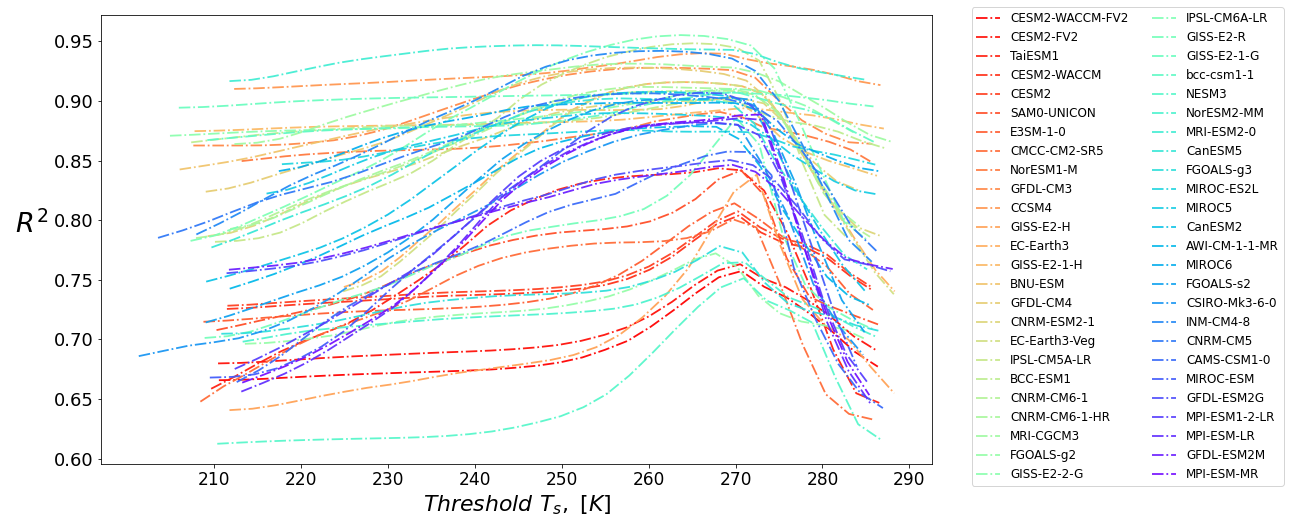

In [44]:
# Plotting R^2 vs. Partition Temperature in piControl simulations:

from matplotlib import colors as mcolor
import numpy as np
import matplotlib.pylab as plab

# plot settings:
parameters = {'axes.labelsize': 22, 'legend.fontsize': 12,
         'axes.titlesize': 22,  'xtick.labelsize': 17,  'ytick.labelsize': 18}
plt.rcParams.update(parameters)

N = 51
colors = plab.cm.rainbow_r(np.linspace(0., 1., N))
print(colors.shape)


fig2 = plt.figure(figsize = (14.9, 8.27))
ax2 = fig2.add_subplot(111)

x = np.linspace(220., 295., 120)
y = np.linspace(0.0, 1.0, 400)
ki = 0
kj = 0
    
for j in range(len(deck3_nas)):
    # separate cmip5 /cmip6:
    # if deck2[j]['cmip'] == 'cmip5':
    #     Line_cmip6 = ax2.plot((Ts_gcm[deck_nas2[j]] + Mean_state_Ts_GCM[deck_nas2[j]]), R2[deck_nas2[j]], 's-.', linewidth = 1.6, c = colors[ki], alpha = 0.80, markersize = 8, label = deck2[j]['modn'], zorder = 11)
    #     ki += 1
    # if deck2[j]['cmip'] == 'cmip6':
    #     Line_cmip5 = ax2.plot((Ts_gcm[deck_nas2[j]] + Mean_state_Ts_GCM[deck_nas2[j]]), R2[deck_nas2[j]], '^--', linewidth = 1.6, c = colors[kj], alpha = 0.95, markersize =10, label = deck2[j]['modn'], zorder = 10)
    #     kj += 1
    
    # do not separate cmip:
    Line_gcm = ax2.plot((Ts_gcm[deck3_nas[j]] + Mean_state_Ts_GCM[deck3_nas[j]]), R2_pi[deck3_nas[j]], '-.', linewidth = 1.8, c = colors[j], alpha = 0.945, markersize = 8, label = deck3[j]['modn'], zorder = 10)
    
# plt.legend([Line_cmip6, Line_cmip5], ['cmip6', 'cmip5'])
plt.legend(bbox_to_anchor = (1.040, 0.23, 0.2, 0.8), ncol = 2)

ax2.set_xlabel(r"$Threshold\ T_{s},\ [K]$")
ax2.set_ylabel(r"$\ R^{2}\ $", fontsize = 27, labelpad = 26, rotation = 360)
ax2.set_xticks(ticks = np.arange(210., 292., 10.))
# ax2.set_title(r"$r^{2}\ versus\ Partition\ Temperature\ for\ 50\ GCMs$")

# plt.savefig(path_plot + "Fig_3.jpg", bbox_inches = 'tight', dpi = 500)

(51, 4)


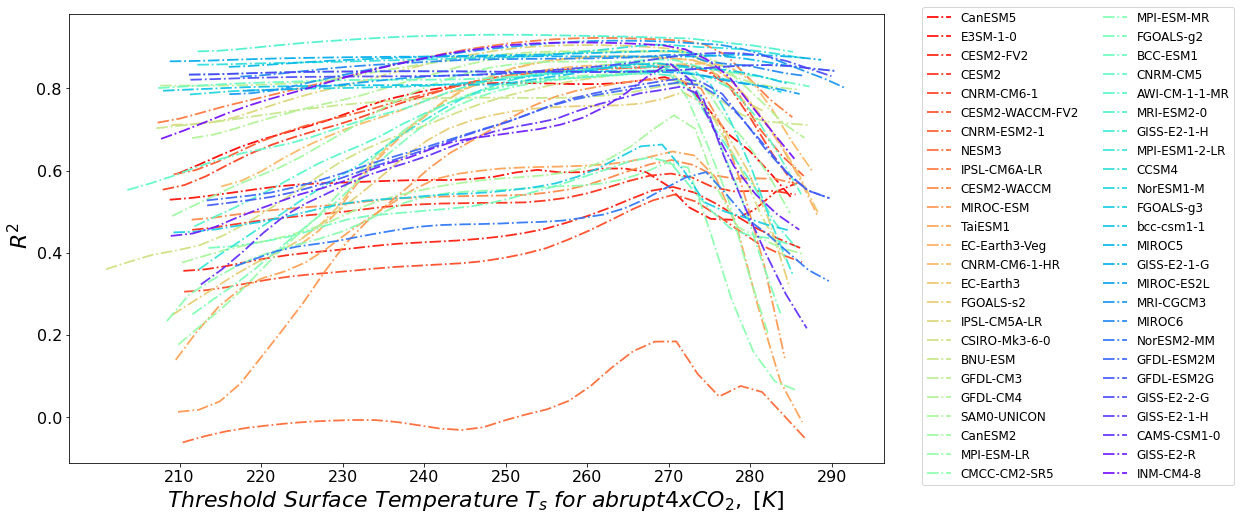

In [10]:
# Plotting R^2 vs. Partition Temperature (abrupt4xCO_2)

from matplotlib import colors as mcolor
import numpy as np
import matplotlib.pylab as plab

# plot settings:
parameters = {'axes.labelsize': 22, 'legend.fontsize': 12,
         'axes.titlesize': 22,  'xtick.labelsize': 16,  'ytick.labelsize': 16}
plt.rcParams.update(parameters)

N = 51
colors = plab.cm.rainbow_r(np.linspace(0., 1., N))
print(colors.shape)


fig2 = plt.figure(figsize = (14.6, 8.25))
ax2 = fig2.add_subplot(111)

x = np.linspace(220., 295., 120)
y = np.linspace(0.0, 1.0, 400)
ki = 0
kj = 0
    
for j in range(len(deck3_nas)):
    
    # do not separate cmip:
    Line_gcm = ax2.plot((Ts_gcm[deck3_nas[j]] + Mean_state_Ts_GCM[deck3_nas[j]]), R2_abr4X[deck3_nas[j]], '-.', linewidth = 1.8, c = colors[j], alpha = 0.945, markersize = 8, label = deck3[j]['modn'], zorder = 10)
    
## plt.legend([Line_cmip6, Line_cmip5], ['cmip6', 'cmip5'])
plt.legend(bbox_to_anchor = (1.040, 0.23, 0.2, 0.8), ncol = 2)

ax2.set_xlabel(r"$Threshold\ Surface\ Temperature\ T_{s}\ for\ abrupt4xCO_{2},\ [K] $")
ax2.set_ylabel(r"$\ R^{2}\ $")
ax2.set_xticks(ticks = np.arange(210., 292., 10.))
# ax2.set_title(r"$R^{2}\ versus\ Partition\ Temperature\ for\ 50\ GCMs$")

# plt.savefig(path_plot + "Fig_S3(a).jpg", bbox_inches = 'tight', dpi = 500)

### Fig_S3:
Comparing the best Partition Surface Temperature for piControl and abrupt4xCO_{2}:

([<matplotlib.axis.YTick at 0x2b9349649290>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

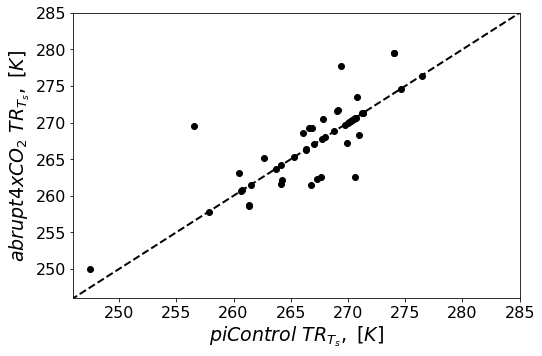

In [14]:
# Plotting:

# plot settings:
parameters = {'axes.labelsize': 19, 'legend.fontsize': 12,
         'axes.titlesize': 22,  'xtick.labelsize': 16,  'ytick.labelsize': 16}
plt.rcParams.update(parameters)


fig3 = plt.figure(figsize = (8, 5.25))
for i in range(len(deck3)):
    
    plt.scatter((TR_Ts_gcm_pi[deck3_nas[i]] + Mean_state_Ts_GCM[deck3_nas[i]]), (TR_Ts_gcm_abr4X[deck3_nas[i]] + Mean_state_Ts_GCM[deck3_nas[i]]), c = 'black')
    # plt.scatter((TR_Ts_gcm_pi[deck3_nas[i]]), (abrupt4xCO_2_Ts_GCM[deck3_nas[i]] - Mean_state_Ts_GCM[deck3_nas[i]]), c = 'black')
    
plt.plot(np.arange(245., 290, 1.), np.arange(245., 290, 1.), c = 'k', linewidth = 2, linestyle = '--')   # '1-1' line

plt.xlim(246, 285)
plt.ylim(246, 285)
# plt.xlim(-25, 11.)
# plt.ylim(0., 8.)
plt.xlabel(r'$piControl\ TR_{T_{s}},\ [K] $')
plt.ylabel(r'$abrupt4xCO_{2}\ TR_{T_{s}},\ [K] $')
# plt.xlabel(r'$piControl\ TR_{T_{s}},\ [K] $')
# plt.ylabel(r'$\overline{T_{s}|_{abr4X}} - \overline{T_{s}|_{piControl}},\ [K] $')
plt.xticks(arange(250., 290., 5.))
plt.yticks(arange(250., 290., 5.))


# plt.savefig(path_plot + "Fig_S3(b).jpg", bbox_inches = 'tight', dpi = 500) # i
# plt.savefig(path_plot + "Fig_S3(c).jpg", bbox_inches = 'tight', dpi = 500)

### Fig 3:

latitudinal distributions of the ratio of Warm regime gridboxes to All (Warm+Cold) gridboxes for 50 GCMs & ratio of "valid gridboxes" to total gridboxes for MAC-LWP (and all observations):

In [6]:
# prep step1: coef_array

# calc data (monthly) standard deviation:
coef1 = []
coef2 = []
# stcoef1  = full((len(deck2), 4), 0)
# stcoef2  = full((len(deck2), 4), 0)

itcp1 = []
itcp2 = []

coef_array_50 = []

# # true LWP response to warming, this array storaged the four regimes response:
# dX_dTg_modelresponse1 = full(len(deck2), 0.000)
# dX_dTg_modelresponse2 = full(len(deck2), 0.000)
# dX_dTg_modelresponse3 = full(len(deck2), 0.000)
# dX_dTg_modelresponse4 = full(len(deck2), 0.000)

# Retrieved the 2-lrm coefficients:
for i in range(len(deck3)):
    
    a_lt = output_2lrm_coef_LWP[deck3_nas[i]][0][0].copy()
    a_le = output_2lrm_coef_LWP[deck3_nas[i]][1][0].copy()
    
    a0_lt = output_2lrm_coef_LWP[deck3_nas[i]][0][1]
    a0_le = output_2lrm_coef_LWP[deck3_nas[i]][1][1]
    
    coef_array_50.append([[a_lt, a0_lt], [a_le, a0_le]])
    # print(coef_array_50)
    
    # print(m, t, e, f)
    coef1.append(a_lt)
    coef2.append(a_le)
    
    itcp1.append(array(a0_lt))
    itcp2.append(array(a0_le))

coef_array_50 = np.asarray(coef_array_50)
# print(coef_array_50[:,0, 0])

In [7]:
# prep step 2: X_dict

X_dict_50_PI  = {}
X_dict_50_abr = {}

for i in arange(len(deck3_nas)):
    
    X_dict_PI = {}
    X_dict_PI['SST'] = output_2lrm_metric_actual_PI[deck3_nas[i]]['SST'].reshape(shape_mon_pi[deck3_nas[i]])
    X_dict_PI['p_e'] = output_2lrm_metric_actual_PI[deck3_nas[i]]['p_e'].reshape(shape_mon_pi[deck3_nas[i]])
    X_dict_PI['LTS'] = output_2lrm_metric_actual_PI[deck3_nas[i]]['LTS'].reshape(shape_mon_pi[deck3_nas[i]])
    X_dict_PI['SUB'] = output_2lrm_metric_actual_PI[deck3_nas[i]]['SUB'].reshape(shape_mon_pi[deck3_nas[i]])
    
    X_dict_abr = {}
    X_dict_abr['SST'] = output_2lrm_metric_actual_abr[deck3_nas[i]]['SST'].reshape(shape_mon_abr[deck3_nas[i]])
    X_dict_abr['p_e'] = output_2lrm_metric_actual_abr[deck3_nas[i]]['p_e'].reshape(shape_mon_abr[deck3_nas[i]])
    X_dict_abr['LTS'] = output_2lrm_metric_actual_abr[deck3_nas[i]]['LTS'].reshape(shape_mon_abr[deck3_nas[i]])
    X_dict_abr['SUB'] = output_2lrm_metric_actual_abr[deck3_nas[i]]['SUB'].reshape(shape_mon_abr[deck3_nas[i]])
    
    
    X_dict_50_PI[deck3_nas[i]] = X_dict_PI
    X_dict_50_abr[deck3_nas[i]] = X_dict_abr

In [8]:
# Building functions:

import numpy as np

def rdlrm_2_predict_modify(X_dict, coef_array, cut_off1, predictant = 'LWP', predictor = ['SST', 'p_e', 'LTS', 'SUB'], r = 2):
    # 'predict_dict' is a dictionary to store the 'predict_label_LWP' and 'predict_value_LWP' (for CCF1, 2, 3, 4,.. and the intercept);
    predict_dict = {}

    # 'predict_label_LWP' is an array to store the regimes_lebel of each grid points in 3-D structure of data array
    predict_label_LWP = np.zeros((X_dict['p_e'].shape[0], X_dict['p_e'].shape[1], X_dict['p_e'].shape[2]))

    # 'predict_value_LWP' is an array to store the predicted LWP
    predict_value_LWP = [X_dict['SST'] *1., X_dict['p_e'] *1., X_dict['LTS'] *1., X_dict['SUB'] *1.,
                         np.ones((X_dict['SST'].shape[0], X_dict['SST'].shape[1], X_dict['SST'].shape[2]))]
    print(np.asarray(predict_value_LWP).shape)

    
    # LOOP THROUGH REGIMES ('2'):
    # split data with skin Temperature (SST) Larger\Equal and Less than Cut_off1
    
    ind_hot = X_dict['SST'] >= cut_off1
    ind_cold = X_dict['SST'] < cut_off1 
    # 
    # ind_up   = X_dict['SUB'] <= cut_off2
    # ind_down = X_dict['SUB'] > cut_off2
    ind6 = ind_hot
    ind7 = ind_cold

    Regimes = [ind7, ind6]
    # print(' Total # of regime', len(Regimes))
    
    for i in range(len(Regimes)):
        # print('current # of regimes', i)
        ind = Regimes[i]
        
        predict_label_LWP[ind] = i + 1
        
        # LOOP THROUGH Cloud Controlling Factors ('4') and intercepts ('+1'):
        
        for j in range(len(predict_value_LWP)):
            # print('current # of ccfs', j)
            if j < 4: 
                predict_value_LWP[j][ind] = 1000. * (coef_array[i,0][j] * predict_value_LWP[j][ind])
            elif j == (len(predict_value_LWP)  - 1): 
                predict_value_LWP[j][ind] = 1000. * (coef_array[i,1] * predict_value_LWP[j][ind])
    
    # Detecting nan values in the CCFs metrics
    Z = X_dict['LTS'] * 1. 

    for k in range(len(predict_value_LWP)):
        Z = Z * predict_value_LWP[k]
    ind_false = np.isnan(Z)
    
    ind_true = np.logical_not(ind_false)
    print('ratio of non-nan in raw GCM data: ', np.asarray(np.nonzero(ind_true==True)).shape[1] / len(X_dict['LTS'].flatten()))  #.. ratio of 'non-nan'.
    
    # match all the points with the same 'NaN' POSITIONS:
    predict_label_LWP[ind_false] = 0
    for l in range(len(predict_value_LWP)): 

        predict_value_LWP[l][ind_false] = np.nan
    
    
    # print("predict_value_LWP ", predict_value_LWP)
    # print("label", predict_label_LWP)  # '1' for 'Cold' regime, '2' for 'Hot' regime
    
    predict_dict['label'] = predict_label_LWP
    predict_dict['value'] = np.asarray(predict_value_LWP)

    return predict_dict

In [9]:
# Calc the ratio(s) of Warm Regime / Cold Regime gridboxes to All Regimes gridboxes versus Latitudes
# GCMs:

Warm_Fr_GCM = {}
Cold_Fr_GCM = {}
WD = '/glade/scratch/chuyan/CMIP_output/'


# find the model wanted:
for N_of_model in range(len(deck3)):

    folder = glob.glob(WD+ deck3_nas[N_of_model]+'__'+ 'STAT_pi+abr_'+'22x_31y_Sep9th_anomalies'+ '.npz')

    output_ARRAY = np.load(folder[0], allow_pickle=True)  # str(TR_sst)
    TR_sst1 = output_ARRAY['TR_minabias_SST']
    TR_sub1 = output_ARRAY['TR_minabias_SUB']
    TR_sst2 = output_ARRAY['TR_maxR2_SST']
    TR_sub2 = output_ARRAY['TR_maxR2_SUB']
    # print("GCM: No.", str(N_of_model+1), " :", deck3[N_of_model]['modn'])
    # print("TR_min_abs(bias): " , TR_sst1, ' K ', TR_sub1 , ' Pa/s ')
    # print("TR_large_pi_R_2: ", TR_sst2, ' K ', TR_sub2 , ' Pa/s ')
    
    predict_dict1 = rdlrm_2_predict_modify(X_dict_50_abr[deck3_nas[N_of_model]], coef_array_50[N_of_model,:,:], cut_off1 = TR_sst2, predictant = 'LWP', predictor = ['SST', 'p_e', 'LTS', 'SUB'], r = 2)
    predict_dict2 = rdlrm_2_predict_modify(X_dict_50_PI[deck3_nas[N_of_model]], coef_array_50[N_of_model,:,:], cut_off1 = TR_sst2, predictant = 'LWP', predictor = ['SST', 'p_e', 'LTS', 'SUB'], r = 2)

    # for loop:
    Regimes = 2
    CCFs = 4

    # individual components:
    predict_label_LWP1 = predict_dict1['label'] *1
    predict_value_LWP1 = deepcopy(predict_dict1['value'] )  # abrupt-4xCO2

    predict_label_LWP2 = predict_dict2['label'] *1
    predict_value_LWP2 = deepcopy(predict_dict2['value'])  # picontrol
    # print(predict_dict2['value'])

    # total LWP changes:
    total_report_LWP1 = output_2lrm_mon_bin_abr[deck3_nas[N_of_model]]['LWP_mon_bin'] * 1    #abr4x
    total_report_LWP2 = output_2lrm_mon_bin_PI[deck3_nas[N_of_model]]['LWP_mon_bin'] * 1   #PI

    # define array to store the total and individual components of 2 lrm:

    fraction_of_occurrence = np.full((Regimes, total_report_LWP2.shape[1], total_report_LWP2.shape[2]), 0.00)  # 2 * N_Lat, N_Lon 

    for R in arange(0, Regimes, 1):
        for i in range(total_report_LWP2.shape[1]):
            for j in range(total_report_LWP2.shape[2]):

                ind_true_grids = predict_label_LWP2[:,i,j] == (R+1)
                fraction_of_occurrence[R, i, j] = np.asarray(np.nonzero(ind_true_grids==True)).shape[1] / (total_report_LWP2.shape[0])   # Average over time axis

    Warm_Fr = np.nanmean(fraction_of_occurrence[1, :, :], axis = 1)   # Average over longitude axis
    Cold_Fr = np.nanmean(fraction_of_occurrence[0, :, :], axis = 1)

    Warm_Fr_GCM[deck3_nas[N_of_model]] = Warm_Fr
    Cold_Fr_GCM[deck3_nas[N_of_model]] = Cold_Fr

(5, 1800, 9, 72)
ratio of non-nan in raw GCM data:  0.9165466392318244
(5, 1188, 9, 72)
ratio of non-nan in raw GCM data:  0.911888951240803
(5, 1800, 9, 72)
ratio of non-nan in raw GCM data:  0.9157355967078189
(5, 1189, 9, 72)
ratio of non-nan in raw GCM data:  0.9116243030246395
(5, 1800, 9, 72)
ratio of non-nan in raw GCM data:  1.0
(5, 1190, 9, 72)
ratio of non-nan in raw GCM data:  1.0
(5, 1800, 9, 72)
ratio of non-nan in raw GCM data:  0.9139557613168724
(5, 1188, 9, 72)
ratio of non-nan in raw GCM data:  0.91030547241967
(5, 1800, 9, 72)
ratio of non-nan in raw GCM data:  0.9143106995884773
(5, 1188, 9, 72)
ratio of non-nan in raw GCM data:  0.9102937814357568
(5, 1800, 9, 72)
ratio of non-nan in raw GCM data:  0.915943072702332
(5, 1189, 9, 72)
ratio of non-nan in raw GCM data:  0.9123563218390804
(5, 1800, 9, 72)
ratio of non-nan in raw GCM data:  0.9315697873799725
(5, 1189, 9, 72)
ratio of non-nan in raw GCM data:  0.9255508311788099
(5, 1802, 9, 72)
ratio of non-nan in raw

In [11]:
# Calc the ratio of Non-Nan gridboxes to Total gridboxes
# OBS: as in calc_LRMobs_metric except do not propage nan value among three data sets:

# get the variables for training:
# inputVar_obs = get_OBSLRM(valid_range1=valid_range1, valid_range2=valid_range2)
# ------------------------
# radiation code

# ------------------------

# Data processing
# --Liquid water path, Unit in kg m^-2
LWP = inputVar_obs['lwp'] / 1000.
# 1-Sigma Liquid water path statistic error, Unit in kg m^-2
LWP_error = inputVar_obs['lwp_error'] / 1000.
# the MaskedArray of 'MAC-LWP' dataset
Maskarray_mac = inputVar_obs['maskarray_mac']
# ---

# GMT: Global mean surface air Temperature (2-meter), Unit in K
gmt = inputVar_obs['tas'] * 1.
# SST: Sea Surface Temperature or skin- Temperature, Unit in K
SST = inputVar_obs['sfc_T'] * 1.
# Precip: Precipitation, Unit in mm day^-1 (convert from kg m^-2 s^-1)
Precip = inputVar_obs['P'] * (24. * 60 * 60)
# Eva: Evaporation, Unit in mm day^-1 (here use the latent heat flux from the sfc, unit convert from W m^-2 --> kg m^-2 s^-1 --> mm day^-1)
lh_vaporization = (2.501 - (2.361 * 10**-3) * (SST - 273.15)) * 1e6  # the latent heat of vaporization at the surface Temperature
Eva = inputVar_obs['E'] / lh_vaporization *(24. * 60 * 60)

# MC: Moisture Convergence with Precip data from MERRA-2, represent the water vapor abundance, Unit in mm day^-1
MC = Precip - Eva
# print(MC)

# LTS: Lower Tropospheric Stability, Unit in K (the same as Potential Temperature):
k = 0.286

theta_700 = inputVar_obs['T_700'] * (100000. / 70000.)**k
theta_skin = inputVar_obs['sfc_T'] * (100000. / inputVar_obs['sfc_P'])**k
LTS_m = theta_700 - theta_skin  # LTS with np.nan

#.. mask the place with np.nan value
LTS_e = np.ma.masked_where(theta_700==np.nan, LTS_m)
# print(LTS_e)

Subsidence = inputVar_obs['sub']

# SW radiative flux:
Rsdt = inputVar_obs['rsdt']
Rsut = inputVar_obs['rsut']
Rsutcs = inputVar_obs['rsutcs']

albedo = Rsut / Rsdt
albedo_cs = Rsutcs / Rsdt
Alpha_cre = albedo - albedo_cs
# abnormal values:
albedo_cs[(albedo_cs <= 0.08) & (albedo_cs >= 1.00)] == np.nan
Alpha_cre[(albedo_cs <= 0.08) & (albedo_cs >= 1.00)] == np.nan

# define Dictionary to store: CCFs(4), gmt, other variables :
dict0_var = {'gmt': gmt, 'SST': SST, 'p_e': MC, 'LTS': LTS_m, 'SUB': Subsidence, 'LWP': LWP, 'rsdt': Rsdt, 'rsut': Rsut, 'rsutcs': Rsutcs, 'albedo' : albedo, 'albedo_cs': albedo_cs, 'alpha_cre': Alpha_cre, 'LWP_statistic_error': LWP_error, 'Maskarray_mac': Maskarray_mac}

# Crop the regions
# crop the variables to the Southern Ocean latitude range: (40 ~ 85^o S)

dict1_SO, lat_merra2_so, lon_merra2_so = region_cropping(dict0_var, ['SST', 'p_e', 'LTS', 'SUB'], inputVar_obs['lat_merra2'], inputVar_obs['lon_merra2'], lat_range = [-85., -40.], lon_range = [-180., 180.])

dict1_SO, lat_mac_so, lon_mac_so = region_cropping(dict1_SO, ['LWP', 'LWP_statistic_error', 'Maskarray_mac'], inputVar_obs['lat_mac'], inputVar_obs['lon_mac'], lat_range =[-85., -40.], lon_range = [-180., 180.])

# Time-scale average
# monthly mean (not changed)
dict2_SO_mon = deepcopy(dict1_SO)

# annual mean variable
dict2_SO_yr = get_annual_dict(dict1_SO, ['gmt', 'SST', 'p_e', 'LTS', 'SUB', 'LWP', 'LWP_statistic_error', 'rsdt', 'rsut', 'rsutcs', 'albedo', 'albedo_cs', 'alpha_cre'], inputVar_obs['times_merra2'], label = 'mon')


# Not Propagate the np.nan values among 3 different datasets, only consider MAC-LWP data set:
# monthly data
test_array_mon = np.ones((dict2_SO_mon['LWP'].shape))
for i in ['LWP', 'LWP_statistic_error']:
    if dict2_SO_mon[i].shape == dict2_SO_mon['LWP'].shape:
        test_array_mon = test_array_mon * (1. * dict2_SO_mon[i])

shape_ratio_mon = np.asarray(np.nonzero(np.isnan(test_array_mon) == True)).shape[1] / len(test_array_mon.flatten())

Maskarray_all_mon = np.isnan(test_array_mon)  # store the mask positions for MAC-LWP in the SO;

x_array_mon = np.zeros((dict2_SO_mon['SST'].shape))  # used for count the missing points in monthly binned boxes
x_array_mon[np.isnan(test_array_mon)] = 1.0

# Propagating the .nan into monthly mean data:
for j in ['LWP', 'LWP_statistic_error']:
    if dict2_SO_mon[j].shape == dict2_SO_mon['LWP'].shape:
        dict2_SO_mon[j][Maskarray_all_mon] = np.nan

# annual data
test_array_yr = np.ones((dict2_SO_yr['LWP'].shape))
for i in ['LWP', 'LWP_statistic_error']:
        if dict2_SO_yr[i].shape == dict2_SO_yr['LWP'].shape:
            test_array_yr = test_array_yr * (1. * dict2_SO_yr[i])

shape_ratio_yr = np.asarray(np.nonzero(np.isnan(test_array_yr) == True)).shape[1] / len(test_array_yr.flatten())
Maskarray_all_yr = np.isnan(test_array_yr)  # store the mask positions for annually mean MERRA-2, MAC-LWP, CERES data in the SO;

x_array_yr = np.zeros((dict2_SO_yr['SST'].shape))  # used for count the missing points in annually mean binned boxes
x_array_yr[np.isnan(test_array_yr)] = 1.0

# Propagating the .nan into annually mean data:
for j in ['LWP', 'LWP_statistic_error']:
    if dict2_SO_yr[j].shape == dict2_SO_yr['LWP'].shape:
        dict2_SO_yr[j][Maskarray_all_yr] = np.nan

# binned (spatial) avergae.
# Southern Ocean 5 * 5 degree bin box

#..set are-mean range and define function
s_range = arange(-90., 90., 5.) + 2.5  #..global-region latitude edge: (36)
x_range = arange(-180., 180.5, 5.)  #..logitude sequences edge: number: 72
y_range = arange(-85, -40., 5.) + 2.5  #..southern-ocaen latitude edge: 9


# binned Monthly variables:
dict3_SO_mon_bin = {}

for e in ['SST', 'p_e', 'LTS', 'SUB', 'LWP', 'LWP_statistic_error', 'rsdt', 'rsut', 'rsutcs', 'albedo', 'albedo_cs', 'alpha_cre']:

    dict3_SO_mon_bin[e] = binned_cySouthOcean5(dict2_SO_mon[e], inputVar_obs['lat_ceres'], inputVar_obs['lon_ceres'])
    # since the latitide/ longitude grid for MERRA-2 (data_type = '2') and MAC-LWP/ CERES-EBAF-TOA_Ed4.1 are the same, it does not matter for the choice of lat/lon.

dict3_SO_mon_bin['gmt'] = binned_cyGlobal5(dict2_SO_mon['gmt'], inputVar_obs['lat_merra2'], inputVar_obs['lon_merra2'])
print("End monthly data binned.")

# binned Annual data (it's different than do the binned operation on the 'dict2_SO_yr'):
dict3_SO_yr_bin = get_annual_dict(dict3_SO_mon_bin, ['gmt', 'SST', 'p_e', 'LTS', 'SUB', 'LWP', 'LWP_statistic_error', 'rsdt', 'rsut', 'rsutcs', 'albedo', 'albedo_cs', 'alpha_cre'], inputVar_obs['times_merra2'])

print("End annual data binned.")

# count the ratio of values that are missing in each bin boxes:
ratio_array = binned_cySO_availabledata(x_array_mon, inputVar_obs['lat_ceres'], inputVar_obs['lon_ceres'])

ind_binned_omit = np.where(ratio_array>0.499, True, False)  # ignoring bin boxes which has the ratio of np.nan points over 0.5.

shape_ratio_bin = np.asarray(np.nonzero(ind_binned_omit == True)).shape[1] / len(ind_binned_omit.flatten())


for k in ['LWP', 'LWP_statistic_error']:
    if dict3_SO_mon_bin[k].shape == dict3_SO_mon_bin['LWP'].shape:
        dict3_SO_mon_bin[k][ind_binned_omit] = np.nan


/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in less_equal
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in greater_equal
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in less_equal
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in greater_equal


 ended cropping 
 ended cropping 
End monthly data binned.
End annual data binned.


In [12]:
# the ratio of 5 X 5 degrees gridbox, with non-nan MAC-LWP gridpoints insides the gridbox >= 0.501 versus Latitudes:

x_array_mon_bin2 = np.zeros((dict3_SO_mon_bin['LWP'].shape))
x_array_mon_bin2[np.logical_not(np.isnan(dict3_SO_mon_bin['LWP']))] = 1.

fraction_of_nonnan = np.full((dict3_SO_mon_bin['LWP'].shape[1]), 0.0)   # N_Lat (9)

for i in range(dict3_SO_mon_bin['LWP'].shape[1]):
    ind_true_grids_obs = x_array_mon_bin2[:,i,:] == 1.
    fraction_of_nonnan[i] = np.asarray(np.nonzero(ind_true_grids_obs==True)).shape[1] / (dict3_SO_mon_bin['LWP'].shape[0]*dict3_SO_mon_bin['LWP'].shape[2]) 
    # Averaged over time axis and longitude axis:

print(fraction_of_nonnan)


[0.         0.00333333 0.01013889 0.17740741 0.63532407 0.9299537
 0.97884259 0.97222222 0.94986111]


(51, 4)


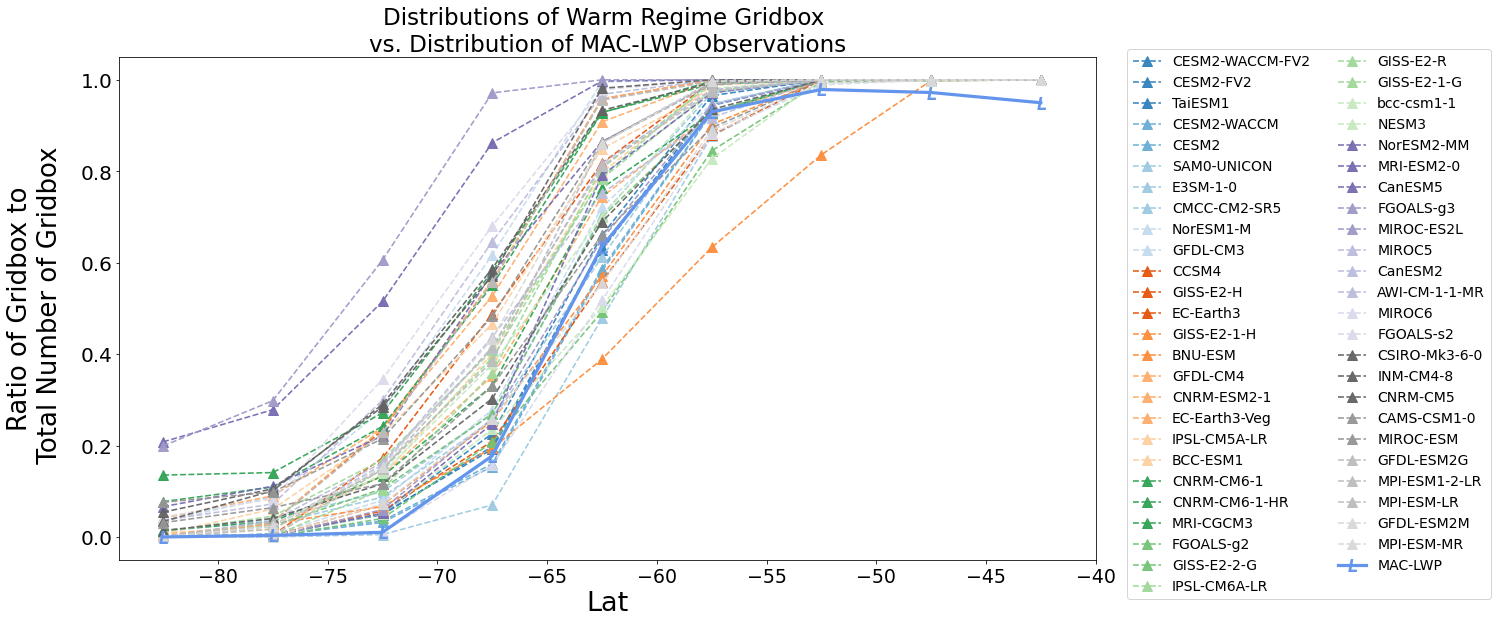

In [25]:
# plotting:
import matplotlib.pylab as plab

# plot settings:
parameters = {'axes.labelsize': 26, 'legend.fontsize': 14, 
         'axes.titlesize': 23,  'xtick.labelsize': 19,  'ytick.labelsize': 20}
plt.rcParams.update(parameters)

N = 51
colors = plab.cm.tab20c(np.linspace(0., 1., N))
print(colors.shape)

fig4 = plt.figure(figsize = (17.5, 9.25))
ax4 = fig4.add_subplot(111)

x = y_range
y = np.linspace(0.0, 1.0, 36)
ki = 0
kj = 0
    
for j in range(len(deck3_nas)):
    # do not separate by cmip5 and cmip6:
    Line4_gcm = ax4.plot(y_range, Warm_Fr_GCM[deck3_nas[j]], '^--', linewidth = 1.6, c = colors[kj], alpha = 0.95, markersize = 10, label = deck3[j]['modn'], zorder = 12)

    kj += 1
    # separate  by cmip5 and cmip6:
#     if deck3[j]['cmip'] == 'cmip5':
#         Line4_cmip6 = ax4.plot(y_range, Warm_Fr_GCM[deck3_nas[j]], 's-.', linewidth = 1.6, c = colors[ki], alpha = 0.80, markersize = 8, label = deck3[j]['modn'], zorder = 11)
#         ki += 1
    
#     if deck3[j]['cmip'] == 'cmip6':
#         Line4_cmip5 = ax4.plot(y_range, Warm_Fr_GCM[deck3_nas[j]], '^--', linewidth = 1.6, c = colors[kj], alpha = 0.95, markersize = 10, label = deck3[j]['modn'], zorder = 10)
#         kj += 1


ax4.plot(y_range, fraction_of_nonnan, linestyle = '-', marker = '$L$', linewidth = 3.2, c = 'cornflowerblue', markersize = 12, alpha = 1, label = 'MAC-LWP', zorder = 15)

## plt.legend([Line_cmip6, Line_cmip5], ['cmip6', 'cmip5'])
plt.legend(bbox_to_anchor = (1.025, 0.23, 0.2, 0.8), ncol = 2)

ax4.set_xlabel("Lat", fontsize = 27)
ax4.set_xticks(ticks = np.arange(-80., -35., 5.))
ax4.set_ylabel("Ratio of Gridbox to\n Total Number of Gridbox", labelpad = 17)
ax4.set_title("Distributions of Warm Regime Gridbox \nvs. Distribution of MAC-LWP Observations")
# plt.savefig(path_plot + "Fig_4.jpg", bbox_inches = 'tight', dpi = 500)